<a href="https://colab.research.google.com/github/moulee18/NM-Project/blob/main/NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')

# Separate features and target
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(" Model Accuracy:", accuracy)
print("\n Classification Report:\n", report)


✅ Model Accuracy: 0.8428571428571429

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.87      0.85      0.86        40

    accuracy                           0.84        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')

In [16]:
df.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
# Separate features and target
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

In [9]:
# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [10]:
# Encode target variable
y = LabelEncoder().fit_transform(y)

In [11]:
# Train-test split and Feature scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\n Classification Report:\n", report)

Model Accuracy: 0.8428571428571429

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.87      0.85      0.86        40

    accuracy                           0.84        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70



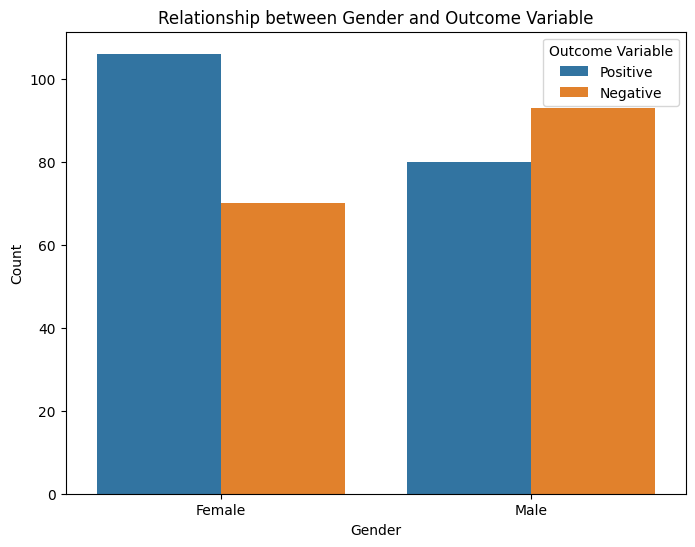

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Outcome Variable', data=df)
plt.title('Relationship between Gender and Outcome Variable')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

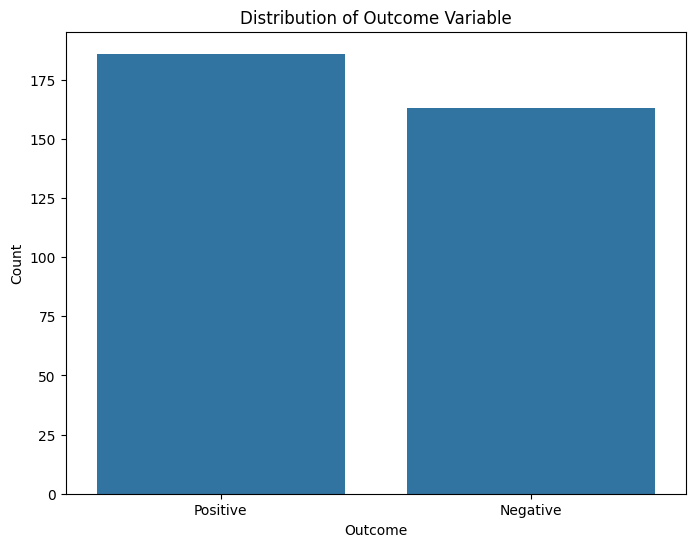

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome Variable', data=df)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()